In [1]:
import pandas as pd
import numpy as np
import dropbox
import os

from scipy.stats import norm
from scipy.stats import poisson
from collections import defaultdict
import matplotlib.pyplot as plt
# import altair as alt
# alt.renderers.enable('notebook')

In [4]:
# class Point():
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

#     def __repr__(self):
#         return 'Point({0},{1})'.format(self.x,self.y)

#     def translate(self, dx, dy):
#         "Add dx and dy to the point."
#         self.x += dx
#         self.y += dy

# e = Point(1.5, 2.5)

In [2]:
tier1_df_M = pd.read_csv("../data/Updated_scores_tier_1_comp_data_men.csv")
tier2_df_M = pd.read_csv("../data/Updated_scores_tier_2_comp_data_men.csv")
tier3_df_M = pd.read_csv("../data/Updated_scores_tier_3_comp_data_men.csv")

tier1_df_W = pd.read_csv("../data/Updated_scores_tier_1_comp_data_women.csv")
tier2_df_W = pd.read_csv("../data/Updated_scores_tier_2_comp_data_women.csv")
tier3_df_W = pd.read_csv("../data/Updated_scores_tier_3_comp_data_women.csv")

In [3]:
tier1_df_M.columns

Index(['Athlete_Comp_ID', 'Score_Metric', 'Finish_Rank', 'Gender',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Round_Group',
       'Season', 'Season_Comp', 'Round', 'Wind', 'Athlete_name'],
      dtype='object')

### Data Modelling starts..

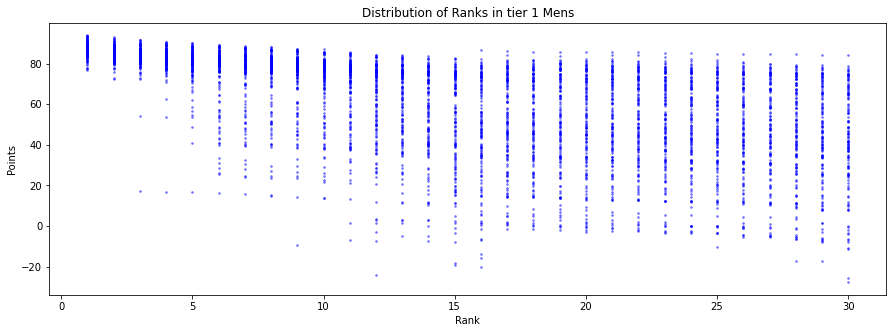

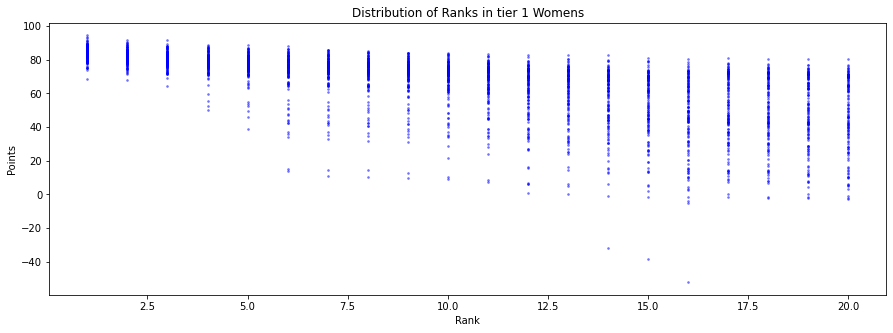

In [4]:
plt.figure(figsize = (15,5))
plt.scatter(tier1_df_M['Finish_Rank'], tier1_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier1_df_W['Finish_Rank'], tier1_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Womens")
plt.show()

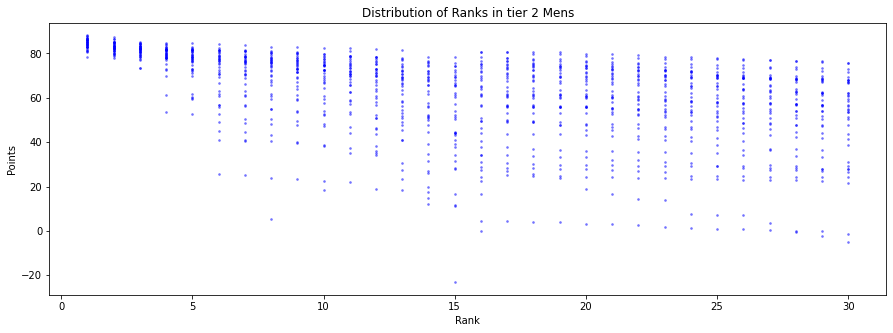

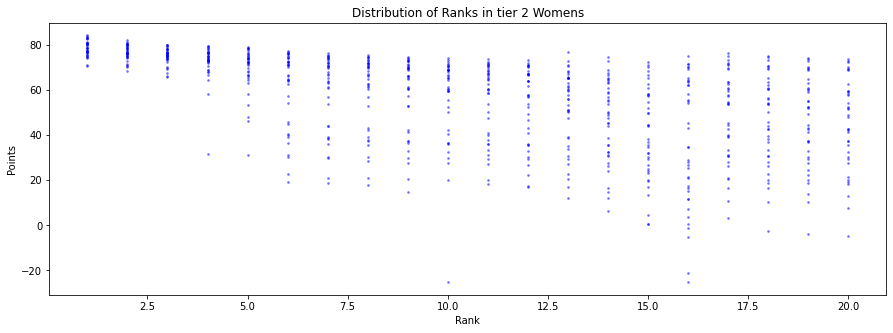

In [5]:
plt.figure(figsize = (15,5))
plt.scatter(tier2_df_M['Finish_Rank'], tier2_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier2_df_W['Finish_Rank'], tier2_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Womens")
plt.show()

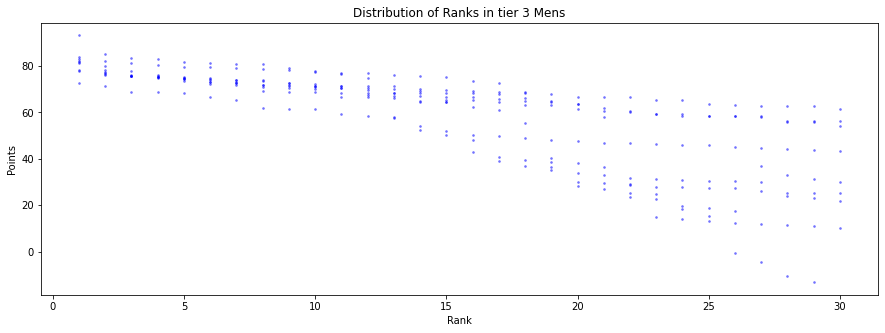

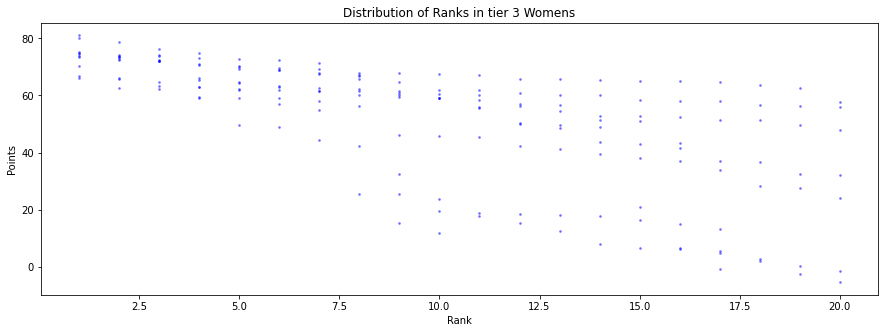

In [6]:
plt.figure(figsize = (15,5))
plt.scatter(tier3_df_M['Finish_Rank'], tier3_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier3_df_W['Finish_Rank'], tier3_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Womens")
plt.show()

In [7]:
alt.Chart(tier1_df_M).mark_bar(size = 2).encode(
    alt.X('Score_Metric:Q', title = "Score"),
    alt.Y('count()', title = "counts"),
    alt.Color('Season:O'),
    tooltip = ['Season']
).transform_filter(
    "(datum.Finish_Rank == 1)"
).properties(title = "Distribution of score of Rank 1 for Tier 1 competitions")

NameError: name 'alt' is not defined

In [62]:
rank = 1
tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == rank].loc[:, 'Score_Metric'].mean()
tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == rank].loc[:, 'Score_Metric'].std()
print(tier1_mean)
print(tier1_std)
tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric']

86.32542713567838
3.65549575096464


181    87.45
182    89.55
188    88.80
189    86.55
190    85.94
198    83.61
206    85.37
207    91.03
210    82.72
227    91.61
240    88.08
264    87.18
297    93.88
306    87.33
311    86.63
322    84.81
328    87.02
347    83.69
359    82.30
Name: Score_Metric, dtype: float64

In [63]:
norm.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric'],
         loc = tier1_mean,
         scale = tier1_std)

array([0.62082146, 0.81114308, 0.75077986, 0.52449334, 0.45801424,
       0.22879104, 0.39690463, 0.90095046, 0.16199218, 0.92586251,
       0.68437997, 0.59242116, 0.98061569, 0.60826953, 0.53320112,
       0.33923154, 0.57534851, 0.23547035, 0.1354051 ])

In [64]:
poisson.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric'],
             mu = tier1_mean)

array([0.55727163, 0.63962924, 0.59907861, 0.51465366, 0.47170266,
       0.38678146, 0.47170266, 0.71542125, 0.34578431, 0.71542125,
       0.59907861, 0.55727163, 0.78217888, 0.55727163, 0.51465366,
       0.42891357, 0.55727163, 0.38678146, 0.34578431])

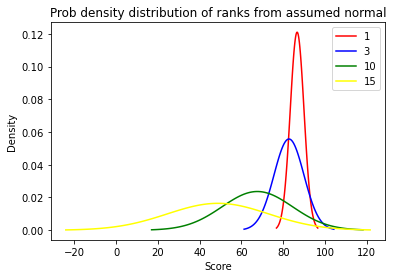

In [8]:
# Plotting cdf for Normal dist
rank = [1,3,10,15]
c = ["red", "blue", "green", "yellow"]

for i, j in zip(rank, c):
    quant_95 =  tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].quantile(0.95)
    tier1_mean = tier1_df_M[(tier1_df_M['Finish_Rank'] == i) & 
                            (tier1_df_M['Score_Metric'] <= quant_95)].loc[:, 'Score_Metric'].mean()
    tier1_std = tier1_df_M[(tier1_df_M['Finish_Rank'] == i) & 
                            (tier1_df_M['Score_Metric'] <= quant_95)].loc[:, 'Score_Metric'].std()

    x = np.linspace(tier1_mean - 3*tier1_std, tier1_mean + 3*tier1_std, 100)
    plt.plot(x, norm.pdf(x, tier1_mean, tier1_std), c = j)
    plt.title("Prob density distribution of ranks from assumed normal")
    plt.xlabel("Score")
    plt.ylabel("Density")

plt.legend(("1", "3", "10", "15"))
plt.show()

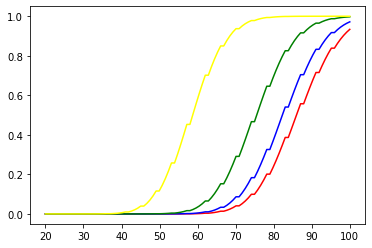

In [69]:
# Plotting cdf for Poisson dist
# rank = [1,3,10,15]
# c = ["red", "blue", "green", "yellow"]

# for i, j in zip(rank, c):
#     tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].mean()
#     tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].std()

#     x = np.linspace(20, 100, 100)
#     plt.plot(x, poisson.cdf(x, mu = tier1_mean), c = j)
    
# plt.show()

In [18]:
Cov =tier1_df_M.groupby(['Finish_Rank'])['Score_Metric'].std() /  tier1_df_M.groupby(['Finish_Rank'])['Score_Metric'].mean()
type(Cov)

pandas.core.series.Series

## Next steps

- Divide ranks based on Cov >= 0.1 and < 0.1 for each tier
- Use Normal for Cov >= 0.1 and Poisson for < 0.1
- Get percentile / z-score for each rank distribution from 1-15
- Divide the z-score / 0.5 to get the multiplier for a rank for a competition
- Use the rank-15 multiplier as the multiplier for lower ranks

In [62]:
# max rank

def get_multiplier(data):
    
    max_rank = data['Finish_Rank'].max()

    multiplier_calc = defaultdict(list)

    max_rank_for_multiplier = 15
    
    competitions = data['Season_Comp'].unique()

    Cov =data[data['Finish_Rank'] <= max_rank_for_multiplier].groupby(['Finish_Rank'])['Score_Metric'].std() /\
        data[data['Finish_Rank'] <= max_rank_for_multiplier].groupby(['Finish_Rank'])['Score_Metric'].mean()
    
    # getting the mean and std dev for each rank
    for i in np.arange(max_rank_for_multiplier)+1:
        multiplier_calc['rank'].append(i)

        multiplier_calc['cov'].append(Cov[i])

        mean = data[data['Finish_Rank'] == i].loc[:, 'Score_Metric'].mean()
        std = data[data['Finish_Rank'] == i].loc[:, 'Score_Metric'].std()

        multiplier_calc['mean'].append(mean)
        multiplier_calc['std'].append(std)
        
    # getting score multiplier based on given rank and score
    for i in range(len(data)):
        
        if data.loc[i,'Finish_Rank'] <= max_rank_for_multiplier:
        
            if multiplier_calc['cov'][data.loc[i,'Finish_Rank']-1] < 0.1:
                z_score = poisson.cdf(data.loc[i, 'Score_Metric'], mu = multiplier_calc['mean'][data.loc[i,'Finish_Rank']-1])
            else:
                z_score = norm.cdf(data.loc[i, 'Score_Metric'], 
                                   multiplier_calc['mean'][data.loc[i,'Finish_Rank']-1],
                                   multiplier_calc['std'][data.loc[i,'Finish_Rank']-1])
            
           
            data.loc[i,'Score_Multiplier'] = z_score/0.5
        
        else:
                        
            competition = data.loc[i, 'Season_Comp']
            low_rank_multiplier = data.loc[(data['Season_Comp'] == competition) & 
                                           (data['Finish_Rank'] == max_rank_for_multiplier), 'Score_Multiplier']
            print(low_rank_multiplier)
            data.loc[i,'Score_Multiplier'] = low_rank_multiplier[0]
            
    return data

In [63]:
get_multiplier(tier1_df_M)

0    0.970651
Name: Score_Multiplier, dtype: float64
132   NaN
Name: Score_Multiplier, dtype: float64


KeyError: 0

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])